In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib as mpl

## Linear Least Squares
The process of finding the line that minimizes the least squares distance can be found using the following formula

Recall:
    $y = mx + b$ where m is the slope and b is the y coordinate of the y-intercept
    
Finding these two quantities is all we need to define our line. 

#### Determining the slope
$$m = \frac{n\sum\limits_{i=1}^n x_iy_i - \sum\limits_{i=1}^n x_i\sum\limits_{i=1}^n y_i}{n\sum\limits_{i=1}^nx_i^2 - \left(\sum\limits_{i=1}^n x_i\right)^2}$$

#### Determining $b$

$$b = -m \bar{x} + \bar{y}$$

In [2]:
mpl.rcParams['figure.figsize'] = (8,8)

In [3]:
def linear_lsq(data, round_to = None):
    n = len(data[0])
    
    #sum of x's
    s_x = np.sum(data[0])
    
    #sum of y's
    s_y = np.sum(data[1])
    
    #sum of x*y
    s_xy = sum(data[0][i]*data[1][i] for i in range(n))
    
    #sum of x**2
    
    s_x2 = sum(data[0][i]**2 for i in range(n))
    
    #slope
    a = (n*s_xy - s_x*s_y)/(n*s_x2 - s_x**2)
    
    #intercept
    b = -a*np.mean(data[0]) + np.mean(data[1])
    
    if round_to:
        a = round(a, round_to)
        b = round(b, round_to)
    
    return a, b

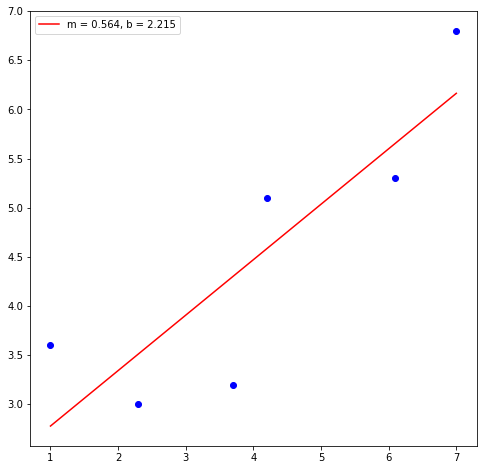

In [37]:
data = [[1, 2.3, 3.7, 4.2, 6.1, 7.0], [3.6, 3.0, 3.2, 5.1, 5.3, 6.8]]

linspc = np.linspace(np.min(data[0]), np.max(data[0]), 1000)

a, b = linear_lsq(data, round_to=3)

plt.figure()
plt.scatter(data[0], data[1], c='b')
plt.plot(linspc, a*linspc + b, 'r', label='m = {}, b = {}'.format(a, b))
plt.legend()
None

In [5]:
print('|Actual|Predicted|Error|')
for i in range(len(data[0])):
    print('--------------------')
    print('|%.4f|%.7f|%.3f|' % (data[1][i], round(a*data[0][i]+b, 3), round(abs(data[1][i] - round(a*data[0][i]+b, 3)), 3)))

|Actual|Predicted|Error|
--------------------
|3.6000|2.7790000|0.821|
--------------------
|3.0000|3.5120000|0.512|
--------------------
|3.2000|4.3020000|1.102|
--------------------
|5.1000|4.5840000|0.516|
--------------------
|5.3000|5.6550000|0.355|
--------------------
|6.8000|6.1630000|0.637|


In [6]:
def power_lsq(data, power, round_to = None):
    
    n = len(data[0])
    
    #sum of x**power*y
    s_xpy = sum(data[1][i]*data[0][i]**power for i in range(n))
    
    #sum of x**(2*power)
    s_x2p = sum(data[0][i]**(2*power) for i in range(n))
    
    a = s_xpy/s_x2p
    
    if round_to:
        a = round(a, round_to)
        
    return a

In [7]:
from IPython.display import Math

x = np.arange(.5, 3.0, .5)
y = [.7, 3.4, 7.2, 12.4, 20.1]

data = [x, y]

a = power_lsq(data, 2, 4)

Math('$y={}x^2$'.format(a))

<IPython.core.display.Math object>

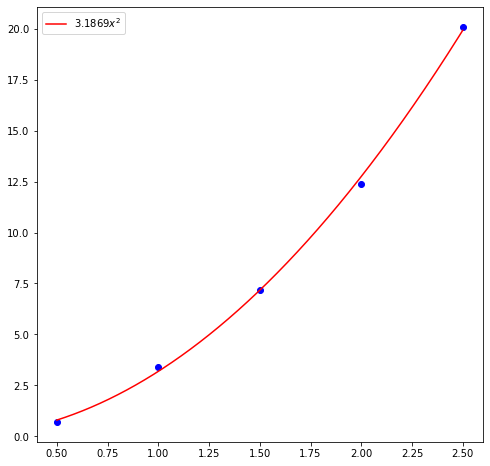

In [8]:
linspc = np.linspace(x[0], x[-1], 1000)

plt.figure()
plt.scatter(x, y, c='b')
plt.plot(linspc, a*linspc**2, 'r', label='{}$x^2$'.format(a))
plt.legend()
None

In [10]:
import pandas as pd
data = pd.read_csv('../Data/Fish.csv', sep=',')

data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


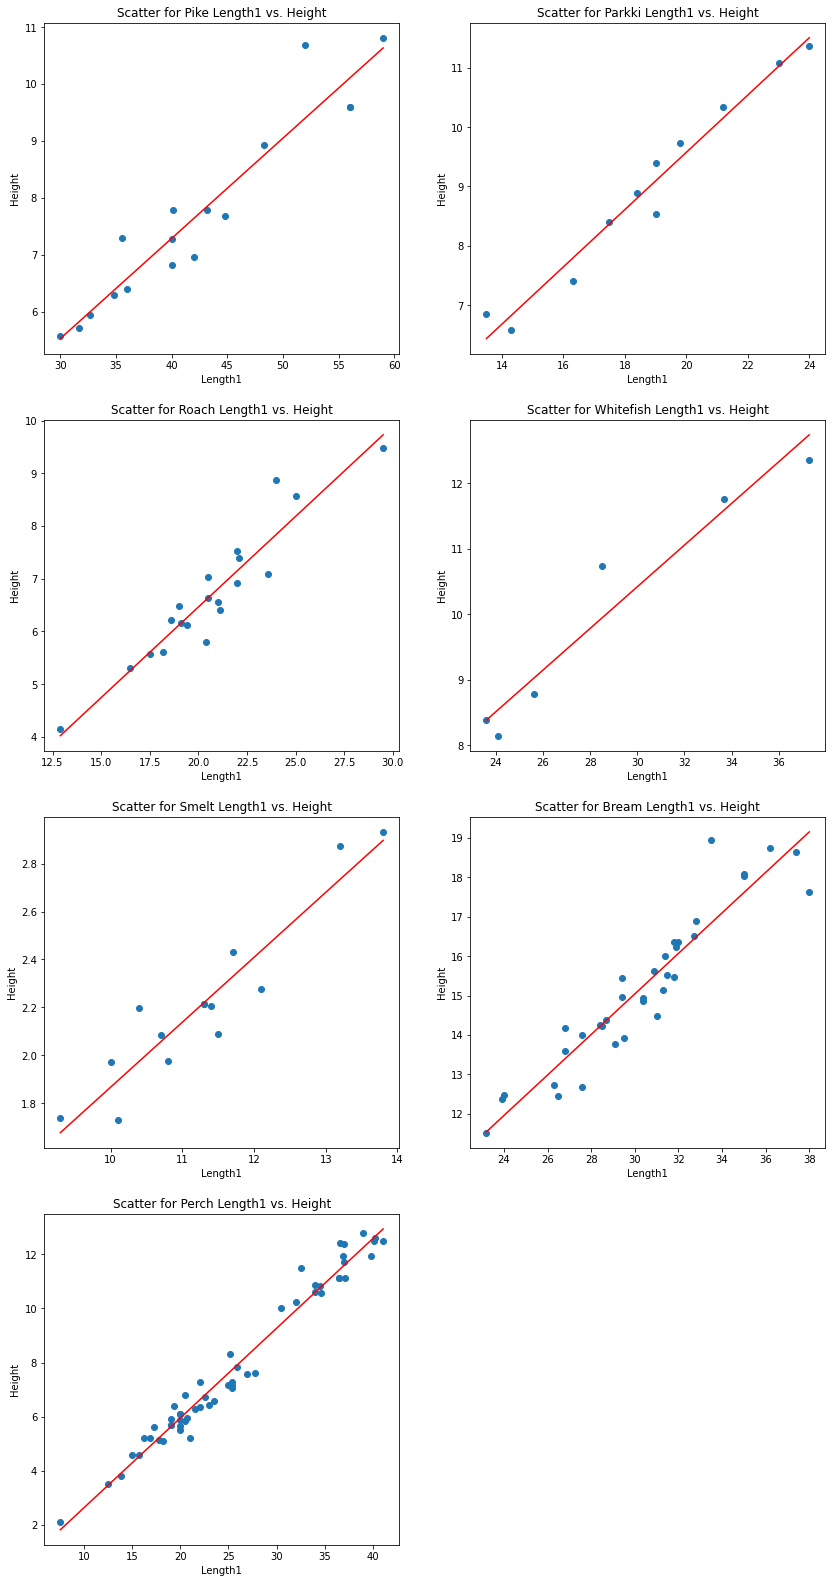

In [35]:
weight = data['Weight']
n_cols = 2
n_rows = int(m.ceil(len(set(data['Species']))/n_cols))

plt.figure(figsize=(14, 14*n_rows/n_cols))
for i, species in enumerate(set(data['Species'])):
    
    linspace = np.linspace(min(data[data['Species']== species]['Length1']), 
                           max(data[data['Species']== species]['Length1']), 1000)
    
    new_data = np.array(data[data['Species'] == species][['Length1', 'Height']])
    
    for_lsq = [new_data[:, 0], new_data[:, 1]]
    
    a, b = linear_lsq(for_lsq, round_to=3)
    
    plt.subplot(n_rows,n_cols, i+1)
    plt.scatter(data[data['Species']== species]['Length1'], data[data['Species']== species]['Height'])
    plt.plot(linspace, a*linspace + b, 'r')
    plt.xlabel('Length1')
    plt.ylabel('Height')
    plt.title('Scatter for {} Length1 vs. Height'.format(species))
    None